### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně (či ve městě dle vašeho výběru)

## Důležité poznámky před začátkem:
- Mezi requesty vkládejte krátké pauzy (např. pomocí `time.sleep(1-2)`), abyste nezatěžovali server.
- **Struktura notebooku**: Váš notebook by měl být přehledně strukturovaný pomocí markdown buněk s nadpisy a komentářů v kódu, které vysvětlují vaše kroky.

## Projekt se dělí na 3 části:

### 1. WebScraping
Pomocí knihovny `BeautifulSoup` získejte **všechny aktuální inzerce bytů** v daném městě. 

**Poznámky:**
- Web scraping musí zahrnovat **všechny stránky** výsledků (pagination), ne pouze první stránku
- Získáte **tyto** informace: 
  - `URL odkaz bytu`
  - `Rozměry bytu` (v m²)
  - `Dispozice bytu` (1+1, 2+kk, atp.)
  - `Cena bytu` (v Kč)
  - `Lokace bytu` (Ulice + město)

**Očekávaný formát dat:**
- **Uložte surová data do CSV souboru** s názvem `{vašeJméno}_surova_data.csv` (tento soubor použijete v další části)

### 2. Datová analýza - ETL proces (Extract, Transform, Load)
V této fázi prověďte processing dat tak, aby obsahovala příslušné datové typy a byla připravená pro analýzu.

**Úkoly:**
- **Načtení dat:**
  - Načtěte surová data z CSV souboru `{vašeJméno}_surova_data.csv`, který jste vytvořili v části 1
  - Zobrazte základní informace o načtených datech (počet řádků, sloupců, náhled dat, datové typy)
  
- **Čištění dat:**
  - Ověřte a opravte datové typy (cena jako číselný typ, rozměry jako číselný typ)
  - Zpracujte chybějící hodnoty (rozhodněte se, zda je odstranit nebo nahradit, a zdůvodněte)
  - Rozdělte lokaci na samostatné sloupce: `Ulice` a `Město`
  
- **Export dat:**
  - Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
  - Před exportem zobrazte základní statistiku o vyčištěných datech (počet řádků, sloupců, základní statistiky)

### 3. Datová analýza - analýza dat
Třetí část začněte tak, že si do dataframe nahrajete vyčištěná data z CSV souboru `{vašeJméno}_zdrojová_data.csv`, který jste vytvořili v části 2.

**Analytické dotazy:**
1. `Jaká je průměrná cena bytů?` (uveďte i medián pro srovnání)
2. `Jaká je průměrná cena bytů pro každou dispozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
3. `Jaká je průměrná velikost bytu pro každou dispozici? Zobrazte i na grafu.`
4. `Existuje ulice, kde je vyšší koncentrace dražších bytů?` (Definujte "dražší" jako byty nad průměrnou cenou. Zobrazte top 5 ulic s nejvyšší průměrnou cenou, pokud máte dostatek dat.)
5. `Jaký typ dispozice je v daném městě nejčastěji inzerován? Který to je? Proč myslíte, že tomu tak je?` (Zobrazte na grafu - např. bar chart nebo pie chart)
6. `Existují zde inzerce bytů, které stojí více než 20.000,- Kč? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
7. `Zjištěte minimální a maximální cenu inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?` (Zobrazte i na grafu)

**Poznámky k analýze:**
- Všechny odpovědi doplňte komentáři a interpretací výsledků
- Pro vizualizace použijte `matplotlib` nebo `seaborn`
- Grafy by měly mít popisky os, titulky a být čitelné

## Odevzdání:
- Dotazy zodpovězte ve vašem pracovním notebooku s komentáři a interpretacemi
- Výsledný soubor nahrajte na GitHub
- V README na GitHubu uveďte stručný popis projektu a hlavní zjištění

## Tipy a užitečné knihovny

**Doporučené knihovny:**
```python
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
```

**Užitečné tipy:**
- Pro pagination: Zkontrolujte, jak stránka implementuje stránkování (URL parametr `?strana=X` nebo jiný mechanismus)
- Pro čištění dat: `pd.to_numeric()` s parametrem `errors='coerce'` pro konverzi cen a rozměrů
- Pro rozdělení lokace: `str.split()`

# Vlastní práce na projektu

### Import knihoven

In [ ]:
## Import potřebných knihoven

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time


# 1. Extrakce dat

In [ ]:
# A: Vytvoření scriptu pro stažení dat z webu 'www.sreality.cz'
# =============================================================

# 1. import knihoven (opakuji)
import requests # (pro účely požadavku na stažení obsahu stránky)
from bs4 import BeautifulSoup # (pro účely extrakce dat)
import pandas as pd # (pro účely import dat)

# 2. vytvoření listu pro uložení stažených inzerátů
inzeraty = []

## 3. vytvoření podmínek pro stránkování
# --------------------------------------------------------------
# 3.1. proměnná pro změnu stránky ve výchozí url adresy a podmínky pro while cyklus; začíná se od str. 1
strana = 1

# 3.2. podmínky pro while cyklus
dalsi_stranka = True  # vzato z podmínky za cyklem

## 4. vytvoření vlastního while cyklu pro stažení dat ze všech stránek s hledanými inzeráty
while dalsi_stranka:
    
    # 4.1. stažení obsahu první (a následující strany) -> odpověď na dotaz
    response = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/zlin?strana={strana}').text

    # 4.2. z odpovědi vytvořit objekt BeautifilSoup a převedení obsahu stránky do html kódu
    soup = BeautifulSoup(response, "html.parser") 
    
    # 4.3. nalezení kontejneru div s s inzeráty
    byty = soup.find_all("div", "css-adf8sc")
    # definicí konkrétní třídy zajistíme, že scrapper přeskočí reklamy, které se v hlavním divu s inzeráty nacházejí
       
    # 4.4. vytvoření for cyklu pro stažení požadovaných dat  
    for byt in byty:
        # 4.4.1. url adresa
        url = "https://www.sreality.cz" + byt.find_parent("a", href=True)["href"]
        
        # 4.4.2. Rozměry bytu, dispozice, ulice, město 
            #-----------------------------------------------------------
            # --> údaje jsou obsaženy v jednom divu, 
            #       nutno pomocí indexu a pomocí metody split() extrahovat požadovaná data
        tags = byt.find_all('p', class_='css-d7upve') 
        
            # a) rozměry bytu
        rozmery = tags[0].get_text(strip=True).split()[3]
        
            # b) dispozice bytu
        dispozice = tags[0].get_text(strip=True).split()[2]
        
            # c) město a ulice 
            # --> vytvoření podmínky, co dělat, pokud jeden z požadovaných údajů chybí
        if len(tags) > 1 and "," in tags[1].get_text():
            mesto = tags[1].get_text(strip=True).split(",")[1].strip()
        else:
            mesto = None

        if len(tags) > 1:
            ulice = tags[1].get_text(strip=True).split(",")[0].strip()
        else:
            ulice = None
        
        # 4.4.3 cena bytu (v Kč)
        cena = byt.find('p', class_="css-ca9wwd").get_text(strip=True)
        pronajem = cena.split()[0] + cena.split()[1]
        
        # 4.4.4. ytvoření slovníkové struktury pro uložení extrahovaných dat do připraveného listu 'inzeraty'
        inzeraty.append(
            {
                "Město": mesto,
                "Ulice": ulice,
                "Dispozice": dispozice,
                "Rozměry bytu (m2)": rozmery,
                "Cena pronájmu (Kč/měsíc)": pronajem,
                "Odkaz na inzerát": url
            }
        )
    
    # 4. 5. vytvoření podmínky pro ukončení procházení stran a stavového řádku
    if soup.find("button", attrs={"aria-label": "Další stránka"}) is None:
        dalsi_stranka = False  # konec while cyklu
        # print řádku o ukončení programu a s informací o počtu stažených inzerátů
        print(f'\nŽádný další inzerát, končím; stáhnul jsem celkem {len(inzeraty)} inzerátů ke zpracování.')
    else:
        strana += 1
        # print řádku s paginací   
        print(f'\rNašel jsem další stránku, procházím stránku: {strana}', end='', flush=True)
            # (znak \r a parametry 'end' a 'flush' zajistí přepisování řádku)

In [ ]:
# B: Export extrahovaných (surových) dat
# =============================================================
# 1. načtení dat do pd tabulky
df_inzeraty = pd.DataFrame(inzeraty)

# 2. export dat do souboru. csv
df_inzeraty.to_csv('HEMPL_surova_data.csv', sep=';', index=False)

print("Stažené inzeráty jsem uložil do souboru 'HEMPL_surova_data.csv'.")     

# 2. Transformace dat, čištění dat

In [466]:
# Načtení extrahovaných dat ze souboru
# ==========================

df_inzeraty = pd.read_csv("HEMPL_surova_data.csv", sep=";")

# tisk 
print("Načetl jsem data z uloženého souboru 'HEMPL_surova_data.csv'.")

Načetl jsem data z uloženého souboru 'HEMPL_surova_data.csv'.


#### 2.1 Základní informace o načtených datech

In [467]:
# A) Výpis souhrnu informací (počet sloupců a řádků, datové typy sloupců, počet nenulových hodnot atd.)

print(df_inzeraty.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Město                     203 non-null    object
 1   Ulice                     222 non-null    object
 2   Dispozice                 222 non-null    object
 3   Rozměry bytu (m2)         222 non-null    int64 
 4   Cena pronájmu (Kč/měsíc)  222 non-null    object
 5   Odkaz na inzerát          222 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.5+ KB
None


In [468]:
# B) Zobrazení základního dataframu 

df_inzeraty.head()

,Město,Ulice,Dispozice,Rozměry bytu (m2),Cena pronájmu (Kč/měsíc),Odkaz na inzerát
0,Zlín,Dlouhá,1+1,40,11500,https://www.sreality.cz/detail/pronajem/byt/1+...
1,Zlín,třída Tomáše Bati,2+1,60,16000,https://www.sreality.cz/detail/pronajem/byt/2+...
2,Zlín,Dlouhá,2+1,56,13000,https://www.sreality.cz/detail/pronajem/byt/2+...
3,Zlín,Nad Stráněmi,1+kk,28,10000,https://www.sreality.cz/detail/pronajem/byt/1+...
4,Zlín,Kvítková,1+1,44,12990,https://www.sreality.cz/detail/pronajem/byt/1+...


In [469]:
# C) Identifikace počtu (statistický přehled)
# ===========================
    # - celkových hodnot
    # - počtu chybějících hodnot
    # - počtu unikátních hodnot
    # - duplikátních hodnot

# vytvoření slovníku pro statistický přehled
summary = pd.DataFrame({
    'Počet hodnot': df_inzeraty.count(),
    'Počet chybějících': df_inzeraty.isnull().sum(),
    'Unikátní hodnoty': df_inzeraty.nunique(),
    'Duplicity': df_inzeraty.duplicated().sum()
})

# převod slovníku do pd.DataFrame
summary = pd.DataFrame(summary)

summary

,Počet hodnot,Počet chybějících,Unikátní hodnoty,Duplicity
Město,203,19,20,11
Ulice,222,0,121,11
Dispozice,222,0,9,11
Rozměry bytu (m2),222,0,77,11
Cena pronájmu (Kč/měsíc),222,0,72,11
Odkaz na inzerát,222,0,211,11


In [470]:
# E) IDENTIFIKACE DUPLICITNÍCH HODNOT
# ================================================

# 1. Kontrola duplicitních hodnot (inzerátů) = kontrola údaje z písm. c)
duplicity = df_inzeraty.duplicated().sum()
print(f"Zjištěno, že duplicitních inzerátů je {duplicity}; níže je uvedena tabulka duplicitních záznamů:")

# 2. duplicitní odkaz na inzerát > zobrazení
df_inzeraty[df_inzeraty.duplicated(subset="Odkaz na inzerát", keep=False)]

Zjištěno, že duplicitních inzerátů je 11; níže je uvedena tabulka duplicitních záznamů:


,Město,Ulice,Dispozice,Rozměry bytu (m2),Cena pronájmu (Kč/měsíc),Odkaz na inzerát
0,Zlín,Dlouhá,1+1,40,11500,https://www.sreality.cz/detail/pronajem/byt/1+...
21,Otrokovice,Moravní,1+kk,36,11500,https://www.sreality.cz/detail/pronajem/byt/1+...
42,Zlín,Nad Stráněmi,2+kk,63,16000,https://www.sreality.cz/detail/pronajem/byt/2+...
44,Zlín,Dlouhá,1+1,40,11500,https://www.sreality.cz/detail/pronajem/byt/1+...
61,Zlín,Nad Stráněmi,1+kk,33,13500,https://www.sreality.cz/detail/pronajem/byt/1+...
63,Zlín,Devadesátá,1+kk,35,12900,https://www.sreality.cz/detail/pronajem/byt/1+...
83,Otrokovice,Moravní,1+kk,36,11500,https://www.sreality.cz/detail/pronajem/byt/1+...
84,Zlín,Nad Stráněmi,1+kk,33,13500,https://www.sreality.cz/detail/pronajem/byt/1+...
105,Zlín,Nad Stráněmi,1+kk,34,12500,https://www.sreality.cz/detail/pronajem/byt/1+...
126,Zlín,Nad Stráněmi,1+kk,34,12500,https://www.sreality.cz/detail/pronajem/byt/1+...


#### 2.2 Čištění dat

In [471]:
# A) Přetypování sloupce s číselnými hodnotami: 'Cena pronájmu (Kč/měsíc)'
# ========================================================================================
# 2. úprava datového typu sloupce 'Cena pronájmu (Kč/měsíc)' na číselný
df_inzeraty["Cena pronájmu (Kč/měsíc)"] = pd.to_numeric(
    df_inzeraty["Cena pronájmu (Kč/měsíc)"], errors='coerce'
)

# 3. kontrola změny sloupců
print(df_inzeraty.dtypes)

print("Proběhlo přetypování sloupce sloupce 'Cena pronájmu (Kč/měsíc)'.")


Město                        object
Ulice                        object
Dispozice                    object
Rozměry bytu (m2)             int64
Cena pronájmu (Kč/měsíc)    float64
Odkaz na inzerát             object
dtype: object
Proběhlo přetypování sloupce sloupce 'Cena pronájmu (Kč/měsíc)'.


In [ ]:
# B_a) CHYBĚJÍCÍ HODNOTY (sloupec 'Město') 
# ========================================

# 1. sloupec město; Vypsání informace před úpravou
pocet_nan = df_inzeraty["Město"].isnull().sum()
print(f"Počet prázdných hodnot ve sloupci 'Město' je celkem {pocet_nan};\ntyto hodnoty budou nahrazeny textem 'Zlín/Zlínsko'.")

# 2. Nahrazení prázdné hodnoty ve sloupci město slovem "Zlín/Zlínsko", jelikož hledáme pronájmy ve Zlíně nebo v jeho blízkém okolí
df_inzeraty["Město"] = df_inzeraty["Město"].fillna("Zlín/Zlínsko")

# 3. Vypsání informace po úpravě
pocet_nan = df_inzeraty["Město"].isnull().sum()
print(f"\nDoplnění dat....\n\nPočet prázdných hodnot ve sloupci Zlín je celkem {pocet_nan}.\nPrázdné hodnoty byly nahrazeny textem 'Zlín/Zlínsko'.")



Počet prázdných hodnot ve sloupci 'Město' je celkem 19;
tyto hodnoty budou nahrazeny textem 'Zlín/Zlínsko'.

Přetypování dat....

Počet prázdných hodnot ve sloupci Zlín je celkem 0.
Prázdné hodnoty byly nahrazeny textem 'Zlín/Zlínsko'.


In [ ]:

# B_b) CHYBĚJÍCÍ HODNOTY (sloupec 'Cena pronájmu (Kč/měsíc)') - pro případ objevení se nulové nodnoty
# ===========================================================

# Vypsání informace před úpravou
# ukáže počet chybějích hodnot, neboť v došlo k přetypování sloupce ze str na int
print(f"Počet prázdných hodnot ve sloupci 'Cena pronájmu (Kč/měsíc)' je celkem {pocet_nan};\ntyto hodnoty budou nahrazeny průměrnou cenou pronájmu.")

# 1. spočítat průměr
mean = df_inzeraty["Cena pronájmu (Kč/měsíc)"].mean()

# 2. nahradit prázdné hodnoty průměrem
df_inzeraty["Cena pronájmu (Kč/měsíc)"] = df_inzeraty["Cena pronájmu (Kč/měsíc)"].fillna(mean)

# 3. Vypsání informace po úpravě
pocet_nan = df_inzeraty["Cena pronájmu (Kč/měsíc)"].isnull().sum()
print(f"\nDoplnění dat...\n\nPočet prázdných hodnot ve sloupci 'Cena pronájmu (Kč/měsíc)' je celkem {pocet_nan}.\nPrázdné hodnoty byly nahrazeny průměrnou cenou pronájmu.")


Počet prázdných hodnot ve sloupci 'Cena pronájmu (Kč/měsíc)' je celkem 3;
tyto hodnoty budou nahrazeny průměrnou cenou pronájmu.

Přetypování dat...

Počet prázdných hodnot ve sloupci 'Cena pronájmu (Kč/měsíc)' je celkem 0.
Prázdné hodnoty byly nahrazeny průměrnou cenou pronájmu.


In [ ]:
# rozdělení lokace na sloupce Ulice a Město provedeno ve fázi Extraction, ale šlo by to takto:

# Předpoklad: df_inzeraty["Lokace"] = "Dlouhá, Zlín"
    # df_inzeraty[['Ulice', 'Město']] = df_inzeraty['Lokace'].str.split(',', expand=True)

# Odstranění případných mezer na začátku a konci
    # df_inzeraty['Ulice'] = df_inzeraty['Ulice'].str.strip()
    # df_inzeraty['Město'] = df_inzeraty['Město'].str.strip()

In [474]:
# C) ODSTRANĚNÍ DUPLICIT
# =======================

# 1. Kontrola duplicit
duplicity = df_inzeraty.duplicated().sum()
print(f"Duplikátních hodnot je celkem {duplicity}, tyto hodnoty budou odstraněny.")

# odstranění doplicit
df_inzeraty = df_inzeraty.drop_duplicates()

pocet = df_inzeraty.shape[0]

print(f"\nOdstranění duplicitních hodnot...\n\nPo odstranění duplicitních hodnot inzerátů zůstává celkem {pocet} inzerátů.")

Duplikátních hodnot je celkem 11, tyto hodnoty budou odstraněny.

Odstranění duplicitních hodnot...

Po odstranění duplicitních hodnot inzerátů zůstává celkem 211 inzerátů.


In [ ]:
df_inzeraty.dtypes

In [477]:
# KONTROLA ÚSPĚŠNOSTI DATA CLEANING
# ==========================================
# zobrazení statistiky o vy čištěných datech

summary = pd.DataFrame({
    'Počet hodnot': df_inzeraty.count(),
    'Počet chybějících': df_inzeraty.isnull().sum(),
    'Unikátní hodnoty': df_inzeraty.nunique(),
    'Duplicity': df_inzeraty.duplicated().sum()
})

summary = pd.DataFrame(summary)
summary

,Počet hodnot,Počet chybějících,Unikátní hodnoty,Duplicity
Město,211,0,21,0
Ulice,211,0,121,0
Dispozice,211,0,9,0
Rozměry bytu (m2),211,0,76,0
Cena pronájmu (Kč/měsíc),211,0,72,0
Odkaz na inzerát,211,0,211,0


### Export upravených dat do souboru

In [479]:
# EXPORT DAT DO SOUBORU 'HEMPL_zdrojova_data.csv' a výpis informace o exportu dat
# ================================================================================

df_inzeraty.to_csv('HEMPL_zdrojova_data.csv', sep=';', index=False)

print(f"Očištěné inzeráty jsem uložil do 'HEMPL_zdrojova_data.csv'. Inzerátů po očištění dat je celkem {len(df_inzeraty)}.")


Očištěné inzeráty jsem uložil do 'HEMPL_zdrojova_data.csv'. Inzerátů po očištění dat je celkem 211.


# 3. Datová analýza 
#### pokus o interpretaci výsledků uveden v README.md

##### Načtené tabulky

In [480]:
# Načtení dat ze zdrojové tabulky
df_inzeraty = pd.read_csv("HEMPL_zdrojova_data.csv", sep=";")

# vypsání věty s informací, s kolika inzeráty pracujeme
print(f"V datasetu je celkem {df_inzeraty.shape[0]} inzerátů.")

# vypsání tabulky
df_inzeraty.head()

V datasetu je celkem 211 inzerátů.


,Město,Ulice,Dispozice,Rozměry bytu (m2),Cena pronájmu (Kč/měsíc),Odkaz na inzerát
0,Zlín,Dlouhá,1+1,40,11500.0,https://www.sreality.cz/detail/pronajem/byt/1+...
1,Zlín,třída Tomáše Bati,2+1,60,16000.0,https://www.sreality.cz/detail/pronajem/byt/2+...
2,Zlín,Dlouhá,2+1,56,13000.0,https://www.sreality.cz/detail/pronajem/byt/2+...
3,Zlín,Nad Stráněmi,1+kk,28,10000.0,https://www.sreality.cz/detail/pronajem/byt/1+...
4,Zlín,Kvítková,1+1,44,12990.0,https://www.sreality.cz/detail/pronajem/byt/1+...


##### 1) Jaká je průměrná cena bytů, uveďte medián pro srovnání.

In [481]:
#výpočet průměrné a mediánové ceny (zaokrouhleno)
avg_cena = round(df_inzeraty["Cena pronájmu (Kč/měsíc)"].mean())
median_cena = round(df_inzeraty["Cena pronájmu (Kč/měsíc)"].median())

# rozdíl v Kč
rozdil = avg_cena - median_cena
rozdil_abs = abs(rozdil) # pro případ, že by medián byl vyšší než průměr

# procentuální rozdíl (vůči mediánu)
rozdil_procent = round((rozdil_abs / median_cena) * 100, 2)

# Nutno upravit pro všechny varianty poměru průměr x median
if avg_cena > median_cena:
    print(
        f"Průměrná cena pronájmu bytu je {avg_cena} Kč,\n"
        f"kdežto medián je {median_cena} Kč.\n"
        f"Průměr je vyšší než medián o {rozdil_abs} Kč "
        f"({rozdil_procent} %)."
    )
elif median_cena > avg_cena:
    print(
        f"Průměrná cena pronájmu bytu je {avg_cena} Kč,\n"
        f"kdežto medián je {median_cena} Kč.\n"
        f"Medián je vyšší než průměr o {rozdil_abs} Kč "
        f"({rozdil_procent} %)."
    )
else:
    print(
        f"Průměrná cena pronájmu bytu je {avg_cena} Kč.\n"
        f"Průměr a medián jsou shodné."
    )

Průměrná cena pronájmu bytu je 14963 Kč,
kdežto medián je 14000 Kč.
Průměr je vyšší než medián o 963 Kč (6.88 %).


In [ ]:
# Pokus o interpretaci
#=====================

# Nižší hodnota mediánu oproti průměru naznačuje, že více než polovina bytů má nájem nižší než průměrná cena; 
# jde o levné a středně drahé byty. Průměrná cena bytu je ovlivněna menším počtem (extrémně vůči průměrné ceně) vysokých nájmů, které tuto zvyšují.

##### 2) Jaká je průměrná cena bytů pro každou dispozici? Zobrazit i na grafu.

Níže je uvedena tabulka s průměrnou cenou bytu pro tu kterou dispozici:
   Dispozice  Cena pronájmu (Kč/měsíc)
0      3+kk                   21204.0
1      4+kk                   18250.0
2       4+1                   17946.0
3       3+1                   17642.0
4      2+kk                   15910.0
5       2+1                   14795.0
6       1+1                   12520.0
7      1+kk                   11593.0
8    pokoje                    7100.0


Následuje grafické znázornění uvedeného:



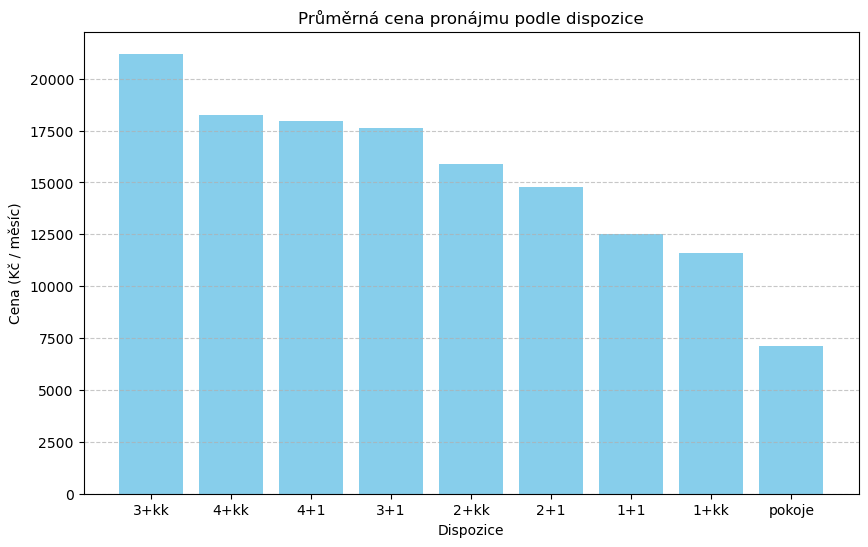

In [482]:
# a) výpočet průměrné ceny pro každou dispozicí a tabulkové zobrazení (ne v pd.DataFrame)
# -------------------------------------------------------------------
avg_cena_disp = (round(df_inzeraty
                       .groupby("Dispozice")["Cena pronájmu (Kč/měsíc)"]
                       .mean().sort_values(ascending=False)
                       .reset_index()))

print(f"Níže je uvedena tabulka s průměrnou cenou bytu pro tu kterou dispozici:\n", avg_cena_disp) 
# formát tabulky uveden schválně, a sice za účelem snadné kopie a přenesení obsahu tabulky do README.md 
# - metoda použita dále u jednotlivých tabulek vyjma otázky č. 6 z důvodu přehlednosti

# ====================================================================================================

# b) grafické znázornění
# ----------------------
import matplotlib.pyplot as plt

# skupinování podle dispozice a výpočet průměrné ceny
avg_cena_disp = (df_inzeraty
                 .groupby("Dispozice")["Cena pronájmu (Kč/měsíc)"]
                 .mean()
                 .sort_values(ascending=False))

# vykreslení grafu s dispozicemi na x-ose
plt.figure(figsize=(10,6))
plt.bar(avg_cena_disp.index, avg_cena_disp.values, color="skyblue")
plt.title("Průměrná cena pronájmu podle dispozice")
plt.xlabel("Dispozice")
plt.ylabel("Cena (Kč / měsíc)")
plt.xticks(rotation=0)  # x-osa vodorovně
plt.grid(axis="y", linestyle="--", alpha=0.7)

print(f"\n\nNásleduje grafické znázornění uvedeného:\n")
plt.show()

In [ ]:
# Pokus o interpretaci
#=====================

# Průměrná výše nájmu u bytu s dispozicí 3+kk se nachází nad 21 tis Kč, jde o cenu výrazně vysoko nad průměrem; 
# nabízená cena pronájmu za 3+kk je o 2 954 Kč dražší než za byt 4+kk, ačkoli 4+kk je v průměru o 5 m2 větší. 
# Byty s dispozicí 3+1 a 4+1 mají podobnou průměrnou cenu, liší se cca 300 Kč, příčemž rozdíl v m2 je 30 m2 v prospěch bytu 4+kk. 
# nejblíže k průměrné ceně má byt s dispozicí 2+1. S ohledem na výsledek otázky č. 1 lze konstatovat, že pokoje, byty s dispozicí 1+kk, 1+1, 2+1 tvoří cca 50 % všech nabídek.

##### 3) Jaká je průměrná velikost bytu pro každou dispozici? Zobrazte i na grafu.

Níže je uvedena tabulka s průměrnou velikostí bytu pro tu kterou dispozici:

   Dispozice  Rozměry bytu (m2)
0       4+1              101.0
1      4+kk               92.0
2      3+kk               87.0
3       3+1               71.0
4       2+1               61.0
5      2+kk               55.0
6       1+1               37.0
7      1+kk               33.0
8    pokoje               18.0


Následuje grafické znázornění uvedeného:



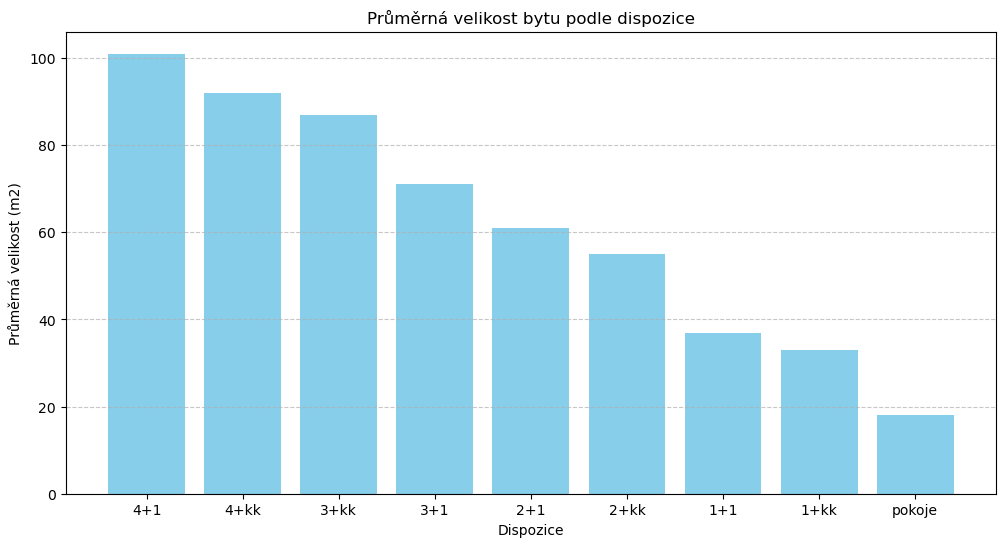

In [ ]:
# průměrná velikost bytu podle dispozice, seřazeno od největší + zaokrouhlit metodou round()
# -------------------------------------------------------------------------------------------
avg_vel_disp = (round(df_inzeraty
                      .groupby("Dispozice")["Rozměry bytu (m2)"]
                      .mean()
                      .sort_values(ascending=False)
                      .reset_index()))

print(f"Níže je uvedena tabulka s průměrnou velikostí bytu pro tu kterou dispozici:\n\n", avg_vel_disp) 

# ====================================================================================================

# b) grafické znázornění
# ----------------------
# průměrná velikost bytu podle dispozice, seřazeno od největší
plt.figure(figsize=(12,6))
plt.bar(avg_vel_disp["Dispozice"], avg_vel_disp["Rozměry bytu (m2)"], color="skyblue")
plt.xlabel("Dispozice")
plt.ylabel("Průměrná velikost (m2)")
plt.title("Průměrná velikost bytu podle dispozice")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
print(f"\n\nNásleduje grafické znázornění uvedeného:\n")
plt.show()

##### 3a) Dodatečné čísštění dat ze zjištěných dat: úprava m2 u "pokoj"

In [ ]:
# a) zhodnocení situace a návrh řešení
# --------------------------------------

# => z uvedného se lze domnívat, že ve sloupci "Rozměry bytu (m2)" je u slova "pokoj" uvedeného ve sloupci "Dispozize" chyba/překlep;
# namísto hodnoty "200" by měla být podle mého názoru hodnota "20" # a místo hodnoty "80" hodnota "8" 
    #  ==> vyfiltrování a výpis pokojů > zjištění situace

df_inzeraty.loc[ df_inzeraty["Dispozice"] == "pokoje"]

,Město,Ulice,Dispozice,Rozměry bytu (m2),Cena pronájmu (Kč/měsíc),Odkaz na inzerát
9,Otrokovice,tř. Spojenců,pokoje,21,10500.0,https://www.sreality.cz/detail/pronajem/byt/po...
65,Zlín/Zlínsko,Březnice,pokoje,20,7500.0,https://www.sreality.cz/detail/pronajem/byt/po...
101,Zlín,Osvoboditelů,pokoje,80,5000.0,https://www.sreality.cz/detail/pronajem/byt/po...
202,Hvozdná,Sokolská,pokoje,21,5500.0,https://www.sreality.cz/detail/pronajem/byt/po...
214,Zlín/Zlínsko,Mysločovice,pokoje,200,7000.0,https://www.sreality.cz/detail/pronajem/byt/po...


In [ ]:
# b) úprava hodnot (provede se prostřednictvím slovníku)
# -----------------------------------------------------

df_inzeraty["Rozměry bytu (m2)"] = df_inzeraty["Rozměry bytu (m2)"].replace({
    200: 20,
    80: 8
})

df_inzeraty.loc[ df_inzeraty["Dispozice"] == "pokoje"]

In [ ]:
# Pokus o interpretaci
#=====================

# Minimální rozdíl v rozloze bytu je mezi 1+kk a 1+1, rozdíl je v průměru o 4 m v prospěch bytu 1+1. 
# U bytů 2+kk a 2+1 je to 6 m. Naopak největší rozdíl je mezi byty 3+kk a 3+1, v průměru 16m2.


##### 4) Existuje ulice, kde jsou vyšší koncentrace dražších bytů? (Definujte "dražší" jako byty nad průměrnou cenou. Zobrazte top 5 ulic s nejvyšší průměrnou cenou.)

In [485]:
# seskupení ulic se průměrným nájmem (zaokrouhleno) pro každou ulici, seskupení od největšího po nejmenší
ulice_prumer = (round(df_inzeraty
                      .groupby("Ulice")["Cena pronájmu (Kč/měsíc)"]
                      .mean()
                      .sort_values(ascending=False)
                      .reset_index(name="Průměrný nájem")))

# vypsání odpovědi:
print(f"Ano, existují ulice, kde je dražší nájem {avg_cena}, níže je výpis 5 nejdražších ulic stran nabízeného nájmu:\n\n", 
      ulice_prumer.nlargest(5, "Průměrný nájem") )

Ano, existují ulice, kde je dražší nájem 14963, níže je výpis 5 nejdražších ulic stran nabízeného nájmu:

                  Ulice  Průměrný nájem
0            Sýkory II         29000.0
1  Jarolímkovo náměstí         25000.0
2         Kpt. Nálepky         24000.0
3               Mostní         23333.0
4     Benešovo nábřeží         22250.0


In [ ]:
# Pokus o interpretaci
#=====================

# Cena pronájmu bytu může být závislá na lokalitě, vybavenosti bytu, dostupnosti veřejné vybavenosti, přístupem k přírodě, bozpečnostní situací dané lokality, stavu nemovitosti atd.

##### 5. Jaký typ dispozice je v daném městě nejčastěji inzerován? který typ dispozice to je? Proč myslíte, že tomu tak je? Graf bar chart nebo pie chart?

V následující tabulce lze vidět pořadí bytů s danou dispozicí podle počtu nabídek k pronájmu:

   Dispozice  Počet bytů  Podíl (%)
0      1+kk          48      22.75
1      2+kk          42      19.91
2       2+1          35      16.59
3       1+1          29      13.74
4      3+kk          27      12.80
5       3+1          19       9.00
6    pokoje           5       2.37
7       4+1           4       1.90
8      4+kk           2       0.95


Následuje grafické znázornění uvedeného:



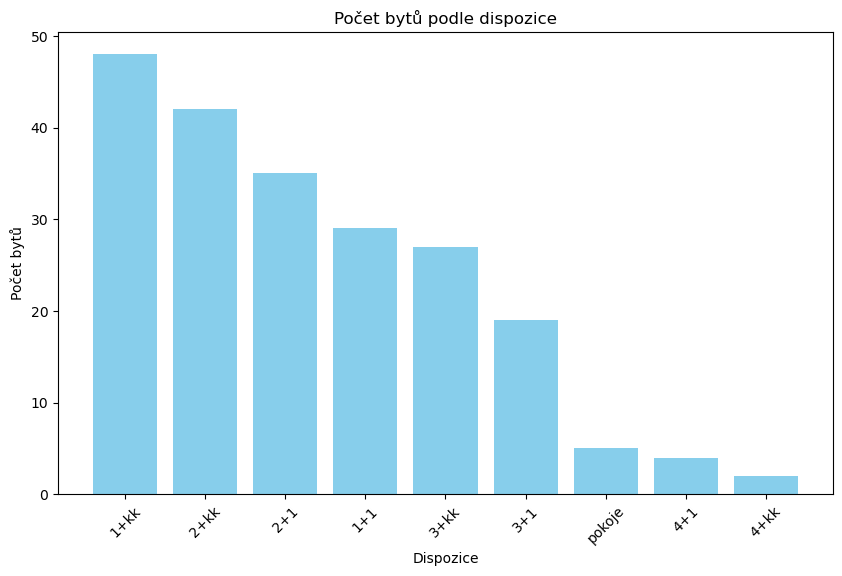

In [506]:
# Spočítáme počet bytů pro každou dispozici
pocet_byty_disp = df_inzeraty.groupby("Dispozice")["Dispozice"].count().sort_values(ascending=False).reset_index(name="Počet bytů")


# součet všech inzerátů za účelm vyjádření procentuálního ukazatele (BONUS)
celkem = pocet_byty_disp["Počet bytů"].sum()

## doplnění sloupce procenta
pocet_byty_disp["Podíl (%)"] = (pocet_byty_disp["Počet bytů"] / celkem) * 100

# Zaokrouhlení procent 
pocet_byty_disp["Podíl (%)"] = pocet_byty_disp["Podíl (%)"].round(2)
print(f"V následující tabulce lze vidět pořadí bytů s danou dispozicí podle počtu nabídek k pronájmu:\n\n", pocet_byty_disp)

# ====================================================================================================

# b) grafické znázornění
# ----------------------
import matplotlib.pyplot as plt

# vytvoření grafu jako bar chart podle tabulky
plt.figure(figsize=(10,6))
plt.bar(pocet_byty_disp["Dispozice"], pocet_byty_disp["Počet bytů"], color="skyblue")
plt.xlabel("Dispozice")
plt.ylabel("Počet bytů")
plt.title("Počet bytů podle dispozice")
plt.xticks(rotation=45)  # otočit názvy osy X pro lepší čitelnost
print(f"\n\nNásleduje grafické znázornění uvedeného:\n")
plt.show()



In [ ]:
# Pokus o interpretaci
#=====================

# Nejvíce nabízených bytů jsou byty s dispozicí 1+kk (48 inzerátů, 22,75 %) a 2+kk (42 inzerátů, 19,91 %) — dohromady tvoří cca 42 % všech nabídek. 
# Menší dispozice obecně dominují v nabídce, což může být vysvětlováno tím, že tyto jednotky jsou obecně atraktivnější pro širší skupinu potenciálních nájemců a tvoří tak podstatnou část trhu._ 

# Pokud jde o otázku "Proč je nejvíce nabízených bytů s dispozicemi 1+kk, 2+kk, lze říci následující:
# >  z pohledu pronajímatele může jít o zohlednění atraktivity těchto dispozic ze strany zájemců (singles, mladé páry, studenti, dojíždějící pracující), 
#    z tohoto důvodu to může být pro ně výhodná investiční příležitost: menší byty se snadněji pronajímají
# >  z pohledu zájemců (singles, mladé páry, studenti, dojíždějící pracující; lidi s omezeným rozpočtem atd. ) jde o vhodný způsob bydlení, a to z hlediska ceny a užitnosti bytu.

##### 6. Existují inzerce bytů, které stojí více než 20 000 Kč? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty?

In [ ]:
pocet_nad_20000 = df_inzeraty.loc[df_inzeraty["Cena pronájmu (Kč/měsíc)"] > 20000]

# vytvoření filtru (masky) pro množinu požadovaných dipsozic
mask = ["pokoje", "1+kk", "1+1", "2+kk", "2+1"]

pozadovane_dispozice = pocet_nad_20000[pocet_nad_20000["Dispozice"].isin(mask)].sort_values(ascending=False)

# výpis odpovědi s výpočtem počtu řádků
print(f"Ano, existují {pozadovane_dispozice.shape[0]} inzerce bytů, které stojí více než 20 tis Kč,\n a zároveň to jsou byty s dispozicí 'pokoje', '1+kk', 1+1', '2+kk', '2+1' jsou uvedeny níže:")

# vypsání tabulky
pozadovane_dispozice.head() # oproti předchozí úpravě tento výpis tabulky je jiný, aby to bylo přehledné


Ano, existují 3 inzerce bytů, které stojí více než 20 tis Kč,
 a zároveň to jsou byty s dispozicí 'pokoje', '1+kk', 1+1', '2+kk', '2+1' jsou uvedeny níže:


,Město,Ulice,Dispozice,Rozměry bytu (m2),Cena pronájmu (Kč/měsíc),Odkaz na inzerát
20,Zlín - Louky,Zadní luhy,2+kk,62,21000.0,https://www.sreality.cz/detail/pronajem/byt/2+...
27,Zlín,Nivy II,2+1,120,20500.0,https://www.sreality.cz/detail/pronajem/byt/2+...
186,Luhačovice,Masarykova,2+kk,70,25000.0,https://www.sreality.cz/detail/pronajem/byt/2+...


In [ ]:
# Pokus o interpretaci
#=====================

# Jedná se byty 2+kk a 2+1, skupin, které dohromady tvoří nejvíce nabídek. 
# Cena pronájmu bytu může být závislá na lokalitě, vybavenosti bytu, dostupnosti veřejné vybavenosti, 
# přístupem k přírodě, bozpečnostní situací dané lokality, stav nemovitosti  atd._

# ! Poznámka__ _Byt pod bodem (index 1) má rozměr 120 m2. Zde je otázka jde o správný údaj anebo překlep. Původní údaj ponechán._


##### 7. Zjisti minimální a maximální cenu inzerce pro každou cenu inzerce bytu. Která dispozice má největší rozptyl mezi maximální a minimální cenou inzerovanou cenou? (Zobraz i na grafu)

Tabulka s maximální a minimální cenou pronájmy s vyjádřením rozptylu mezi krajními hondotami:
    Dispozice  Maximální cena  Minimální cena   Rozdíl
5      3+kk         33000.0         12500.0  20500.0
3      2+kk         25000.0          9500.0  15500.0
4       3+1         26000.0         12500.0  13500.0
2       2+1         20500.0         11000.0   9500.0
0       1+1         16500.0          9500.0   7000.0
1      1+kk         14900.0          7900.0   7000.0
8    pokoje         10500.0          5000.0   5500.0
6       4+1         20000.0         14885.0   5115.0
7      4+kk         19000.0         17500.0   1500.0


Následuje grafické znázornění uvedeného:



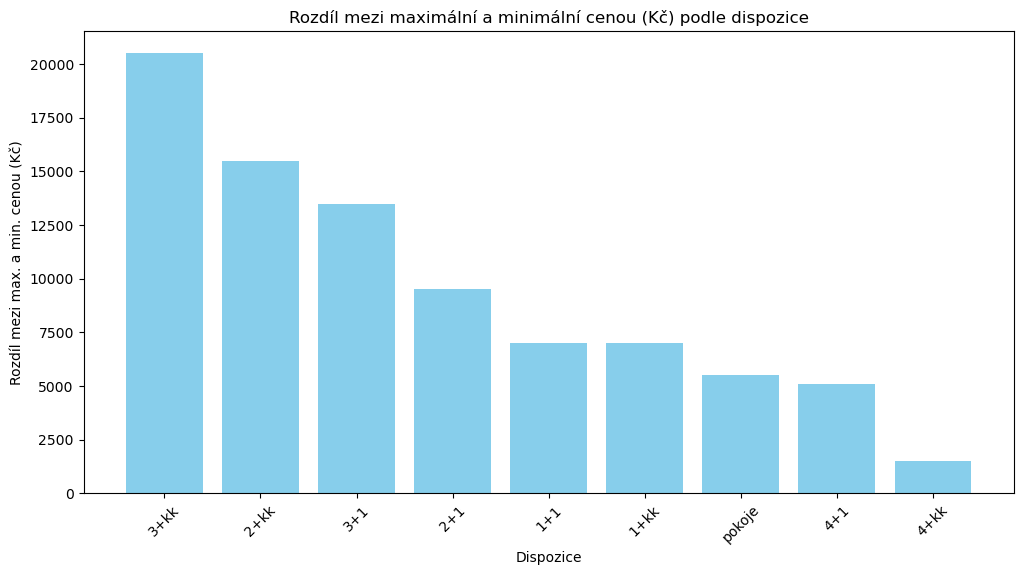

In [492]:
# maximální cena podle dispozice
max_cena = df_inzeraty.groupby("Dispozice")["Cena pronájmu (Kč/měsíc)"].max().reset_index()
max_cena["Cena pronájmu (Kč/měsíc)"] = max_cena["Cena pronájmu (Kč/měsíc)"].round()
max_cena.rename(columns={"Cena pronájmu (Kč/měsíc)": "Maximální cena"}, inplace=True)

# minimální cena podle dispozice
min_cena = df_inzeraty.groupby("Dispozice")["Cena pronájmu (Kč/měsíc)"].min().reset_index()
min_cena["Cena pronájmu (Kč/měsíc)"] = min_cena["Cena pronájmu (Kč/měsíc)"].round()
min_cena.rename(columns={"Cena pronájmu (Kč/měsíc)": "Minimální cena"}, inplace=True)

# spojení do jednoho DataFrame
df_ceny_disp = pd.merge(max_cena, min_cena, on="Dispozice")

df_ceny_disp.head()


# přidání sloupce s rozdílem mezi max a min cenou
df_ceny_disp["Rozdíl"] = df_ceny_disp["Maximální cena"] - df_ceny_disp["Minimální cena"]

# seřazení DataFrame podle rozdílu
ceny_disp_sorted = df_ceny_disp.sort_values(by="Rozdíl", ascending=False)

print(f"Tabulka s maximální a minimální cenou pronájmy s vyjádřením rozptylu mezi krajními hondotami:\n ", ceny_disp_sorted)
      
# ====================================================================================================

# b) grafické znázornění
# ----------------------    
      
import matplotlib.pyplot as plt

# velikost grafu
plt.figure(figsize=(12,6))

# vytvoření grafu: x = dispo
plt.bar(ceny_disp_sorted["Dispozice"], ceny_disp_sorted["Rozdíl"], color="skyblue")

# popisky
plt.xlabel("Dispozice")
plt.ylabel("Rozdíl mezi max. a min. cenou (Kč)")
plt.title("Rozdíl mezi maximální a minimální cenou (Kč) podle dispozice")
plt.xticks(rotation=45)  # otočit popisky pro lepší čitelnost
print(f"\n\nNásleduje grafické znázornění uvedeného:\n")
# zobrazit graf
plt.show()
     


In [ ]:
# Pokus o interpretaci
#=====================

# Největší rozdíl cen v pronájmech je by bytů 3+kk, nejmenší u bytů s dispozicí 4+kk. 
# Rozdíl v cenách může být způsobena: lokalitou, vybaveností bytu, dostupností veřejné vybavenosti, přístupem k přírodě, bezpečnostní situací dané lokality atd.